### Importing important and useful libraries

In [45]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import time  

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline 

from PIL import Image 
from bs4 import BeautifulSoup 
from selenium import webdriver
import networkx as nx 

import pickle

import warnings 
warnings.filterwarnings('ignore')

In [46]:
phish_data = pd.read_csv(r"E:\dataset_folder\phishing_site_urls.csv")

In [47]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [48]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [49]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [50]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [51]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

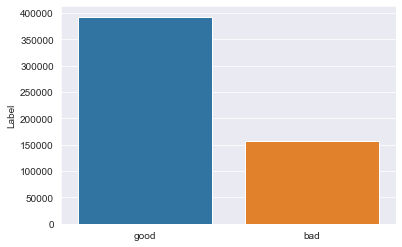

In [52]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

#### Data Preprocessing 

In [53]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [54]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [55]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [56]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 6.15512149999995 sec


In [57]:
phish_data.sample(5)

,URL,Label,text_tokenized
255241,vietmessenger.com/books/?title=thegreatgatsby,good,"[vietmessenger, com, books, title, thegreatgat..."
360261,imdb.com/title/tt0247082/epcast,good,"[imdb, com, title, tt, epcast]"
184289,espn.go.com/blog/bigeast/tag/_/name/jeff-mullen,good,"[espn, go, com, blog, bigeast, tag, name, jeff..."
361404,indeed.com/cmp/Partners-1st-Federal-Credit-Union,good,"[indeed, com, cmp, Partners, st, Federal, Cred..."
423427,riedelstudio.com/about.html,good,"[riedelstudio, com, about, html]"


In [58]:
stemmer = SnowballStemmer("english")

In [89]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word).lower() for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 93.91393460000108 sec


In [60]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
492561,down.onowcdn.com/onekeysdk/tr_new/rt0922_132.apk,bad,"[down, onowcdn, com, onekeysdk, tr, new, rt, apk]","[down, onowcdn, com, onekeysdk, tr, new, rt, apk]"
243907,streema.com/radios/Rock_Detente_107.3_CITE_FM,good,"[streema, com, radios, Rock, Detente, CITE, FM]","[streema, com, radio, rock, detent, cite, fm]"
16064,'services.runescape.com.vvi-log.tk/m=forum/for...,bad,"[services, runescape, com, vvi, log, tk, m, fo...","[servic, runescap, com, vvi, log, tk, m, forum..."
40117,devon-holiday-accommodation.co.uk/paypal/websc...,bad,"[devon, holiday, accommodation, co, uk, paypal...","[devon, holiday, accommod, co, uk, paypal, web..."
495655,spaandonk.com/6t75x,bad,"[spaandonk, com, t, x]","[spaandonk, com, t, x]"


In [61]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.3958695999990596 sec


In [62]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
238309,settlement.arc.nasa.gov/,good,"[settlement, arc, nasa, gov]","[settlement, arc, nasa, gov]",settlement arc nasa gov
362640,insidesupcom.de/showthread.php?11721-Gnug-Tips...,good,"[insidesupcom, de, showthread, php, Gnug, Tips...","[insidesupcom, de, showthread, php, gnug, tip,...",insidesupcom de showthread php gnug tip for su...
289303,bayut.com/uae_dubai_property_agent/smith_ken_r...,good,"[bayut, com, uae, dubai, property, agent, smit...","[bayut, com, uae, dubai, properti, agent, smit...",bayut com uae dubai properti agent smith ken r...
16906,electriciankloof.co.za/wp-content/plugins/brok...,bad,"[electriciankloof, co, za, wp, content, plugin...","[electriciankloof, co, za, wp, content, plugin...",electriciankloof co za wp content plugin broke...
16571,'services.runescape.com.wf-log.tk/m=forum/foru...,bad,"[services, runescape, com, wf, log, tk, m, for...","[servic, runescap, com, wf, log, tk, m, forum,...",servic runescap com wf log tk m forum forum ws


### Model and Data Visualization

In [63]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [64]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [65]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [66]:
cv = CountVectorizer()

In [67]:
feature = cv.fit_transform(phish_data.text_sent)

In [68]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(trainX,trainY)

LogisticRegression()

In [72]:
lr.score(testX,testY)

0.9656101414768052

In [73]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9785320223587349
Testing Accuracy : 0.9656101414768052

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36849
        Good       0.99      0.97      0.98    100488

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

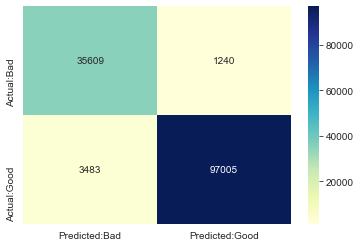

In [74]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [75]:
mnb = MultinomialNB()

In [76]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [92]:
mnb.score(testX,testY)

ValueError: could not convert string to float: 'genforum.genealogy.com/richards/'

In [78]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740224121317739
Testing Accuracy : 0.9583870333559056

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38263
        Good       0.98      0.97      0.97     99074

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

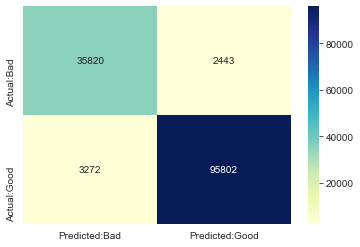

In [79]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

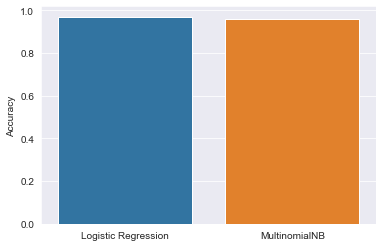

In [80]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [81]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [82]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [83]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [84]:
pipeline_ls.score(testX,testY) 

0.9663091519401181

Training Accuracy : 0.980548968590492
Testing Accuracy : 0.9663091519401181

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36864
        Good       0.99      0.97      0.98    100473

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

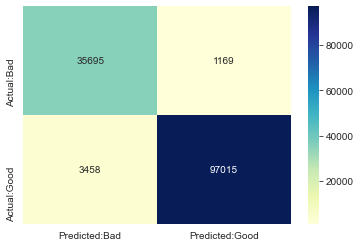

In [85]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [86]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [90]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9663091519401181


In [91]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
